
# Segment Trees

This notebook covers key concepts related to Segment Trees, which are used to efficiently perform range queries and updates on arrays. The notebook includes examples of operations like range sum queries, range updates, and problems like pizza price queries.



## Theory of Segment Trees

A **Segment Tree** is a binary tree used for storing intervals or segments. It allows querying and updating an array of values in logarithmic time. 

### Key Operations:
- **Range Query**: Efficiently calculates some property (e.g., sum, minimum, maximum) over a specified range of an array.
- **Range Update**: Efficiently updates all values in a given range of the array.

### Segment Tree Construction:
- The tree is constructed from an array and is typically a full binary tree where each node stores information about a range of the array.
- Each leaf node corresponds to an individual element of the array.
- Internal nodes store information about the range formed by the leaves in their subtrees.

### Complexity:
- **Query Operation**: O(log n)
- **Update Operation**: O(log n)



## Segment Tree Construction Example

Consider the array A = [2, 7, 1, 8, 0, 6, 3, 6]. The segment tree for this array would be constructed as follows:

1. The leaf nodes store the array elements.
2. Internal nodes store the sums (or any other aggregate function) of their respective subarrays.

After building the segment tree, the structure will look like the following:


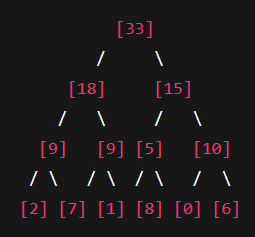

Here, each internal node stores the sum of its children. This tree allows us to efficiently compute the sum of any subarray in O(log n) time.


## Segment Tree Operations

### Pseudocode for Range Sum Query:
1. Traverse the segment tree starting from the root.
2. If the query range is completely contained within the current node's range, return the stored value.
3. If the query range partially overlaps with the current node's range, recurse into the left and right subtrees.

### Python Code for Range Sum Query:
```python
class SegmentTree:
    def __init__(self, array):
        self.n = len(array)
        self.tree = [0] * (2 * self.n)
        self.build(array)

    def build(self, array):
        # Insert leaf nodes in the tree
        for i in range(self.n):
            self.tree[self.n + i] = array[i]
        
        # Build the segment tree by calculating parents
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[2 * i] + self.tree[2 * i + 1]

    def range_sum(self, left, right):
        # Convert to 0-based indexing
        left += self.n
        right += self.n
        sum = 0
        while left <= right:
            if left % 2 == 1:
                sum += self.tree[left]
                left += 1
            if right % 2 == 0:
                sum += self.tree[right]
                right -= 1
            left //= 2
            right //= 2
        return sum
```

### Pseudocode for Range Update:
1. For the range to be updated, traverse the segment tree and update the relevant nodes.
2. Apply the update to the range and propagate the change upwards.

### Python Code for Range Update:
```python
    def range_update(self, left, right, value):
        # Convert to 0-based indexing
        left += self.n
        right += self.n
        while left <= right:
            if left % 2 == 1:
                self.tree[left] += value
                left += 1
            if right % 2 == 0:
                self.tree[right] += value
                right -= 1
            left //= 2
            right //= 2
```



## Pizza Price Query Problem

### Pseudocode for FINDCHEAPPIZZA Query:
1. Use a segment tree to store pizza prices in each building.
2. For each query, traverse the segment tree to find the cheapest pizza within the specified range.

### Python Code for FINDCHEAPPIZZA:
```python
class PizzaPriceQuery:
    def __init__(self, prices):
        self.n = len(prices)
        self.tree = [0] * (2 * self.n)
        self.build(prices)

    def build(self, prices):
        # Insert leaf nodes in the tree
        for i in range(self.n):
            self.tree[self.n + i] = prices[i]
        
        # Build the segment tree by calculating parents
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = min(self.tree[2 * i], self.tree[2 * i + 1])

    def find_cheapest_pizza(self, left, right):
        # Convert to 0-based indexing
        left += self.n
        right += self.n
        min_price = float('inf')
        while left <= right:
            if left % 2 == 1:
                min_price = min(min_price, self.tree[left])
                left += 1
            if right % 2 == 0:
                min_price = min(min_price, self.tree[right])
                right -= 1
            left //= 2
            right //= 2
        return min_price
```
